In [85]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from Analisis_Predictivo import Analisis_Predictivo
import os
os.chdir("/home/william/Desktop")

In [86]:
potabilidad = pd.read_csv("potabilidad_V2.csv")
potabilidad = potabilidad.iloc[:,1:]
potabilidad["Potability"] = potabilidad["Potability"].astype('category')

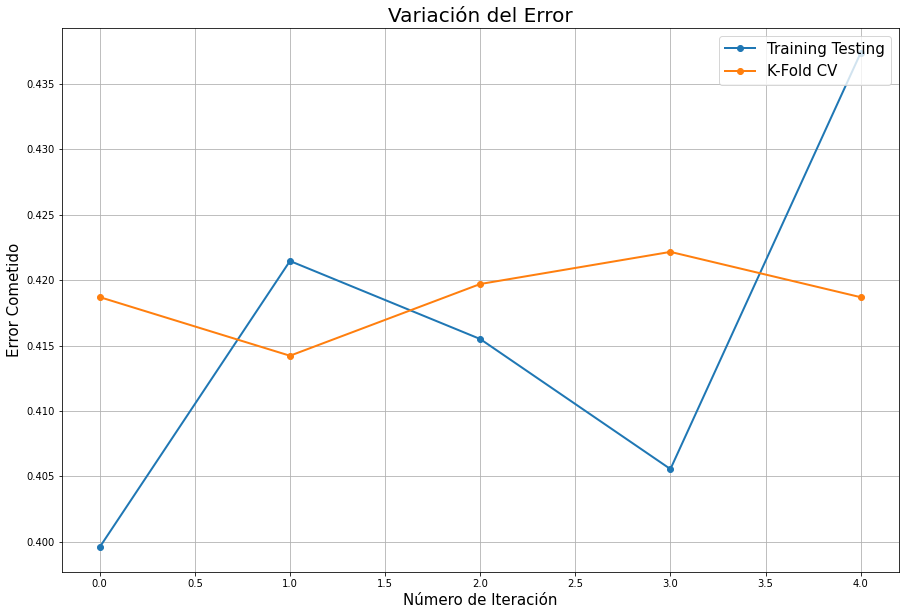

In [87]:
kne =  KNeighborsClassifier(n_neighbors=50, algorithm="auto")
analisisKne = Analisis_Predictivo(potabilidad,predecir= "Potability",modelo=kne,
                                       train_size= 0.75)
analisisKne.graficar_validacion_error_validacion_kfold_vs_testing(5)

El error de cometido de cross-validation es mucho más constante, que el error de training testing, yo considero esto positivo porque básicamente es más confiable a la hora de evaluar un modelo de machine learning.

In [88]:
entropyTree =  DecisionTreeClassifier(criterion="entropy")
giniTree =  DecisionTreeClassifier(criterion="gini")

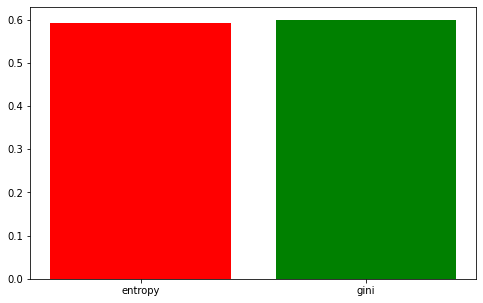

In [89]:
class Graficar():
    def __init__(self, models, label, color,  x, y):
        self.__color = color
        self.__label = label
        self.__models = models
        self.__porcentajes = []
        self.__x = x
        self.__y = y

    def getPorcentajeKFoald(self):
        for model in self.__models:
            instancia_kfold = KFold(n_splits=10,shuffle=True)
            crossScore = cross_val_score(model, self.__x, self.__y, cv=instancia_kfold)
            self.__porcentajes.append(crossScore.mean())

    def barras(self):
        self.getPorcentajeKFoald()
        plt.figure(figsize=(8,5))
        barras = self.__label
        y_pos = np.arange(len(barras))
        plt.bar(y_pos, self.__porcentajes, color=self.__color)
        plt.xticks(y_pos, barras)
        plt.show()

graficar = Graficar(models=[entropyTree, giniTree],label=["entropy","gini"], color=["red", "green"], x=analisisKne.x, y=analisisKne.y)
graficar.barras()

La barra verde es del GINI, y se ve que es mucho mejor modelo que el entropy

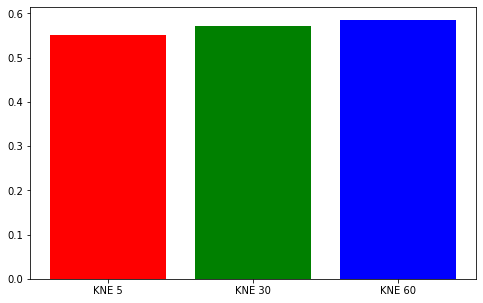

In [90]:
kne5 =  KNeighborsClassifier(n_neighbors=5, algorithm="auto")
kne30 =  KNeighborsClassifier(n_neighbors=30, algorithm="auto")
kne60 =  KNeighborsClassifier(n_neighbors=60, algorithm="auto")

graficar = Graficar(models=[kne5, kne30, kne60],label=["KNE 5","KNE 30","KNE 60"], color=["red", "green", "blue"], x=analisisKne.x, y=analisisKne.y)
graficar.barras()

Los 60 cluster son la mejor forma de predecir, el color azul